In [1]:
import os
os.chdir("../../..")

In [2]:
import json

import numpy as np
import pandas as pd
from pprint import pprint

from oracle4grid.core.utils.prepare_environment import prepare_env, prepare_params, get_initial_configuration
from oracle4grid.core.utils.actions_generator import init_plot_helper, plot_action, append_unitary_actions, get_valid_sub_action, get_valid_line_action

c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\grid2op\Backend\PandaPowerBackend.py:31: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\scripts\python.exe -m pip install numba

  "\n\t{} -m pip install numba\n".format(sys.executable))


# 1 - Load Grid2op environment

In [17]:
# Your config
env_path = "oracle4grid/ressources/grids/rte_case14_realistic"
chronic = '000'
save_action_path = "oracle4grid/ressources/actions/test_unitary_actions_5.json"

In [4]:
param = prepare_params()
env = prepare_env(env_path, chronic, param)

INFO - An integer has been provided as chronic scenario - looking for the chronic folder in this position
INFO - the name of the loaded Grid2op scenario is : 000


# 2 - Visualize & Export desired actions

D:\RTE\Challenge RL - Oracle\1 - Développement\MarotA\Oracle4Grid\oracle4grid\core\utils\actions_generator.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


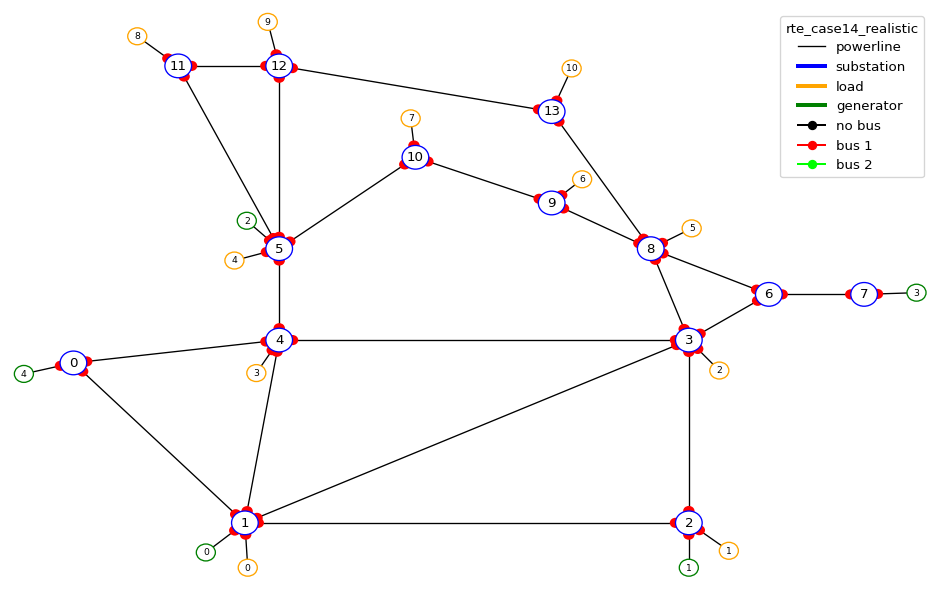

In [5]:
# Init
action_space = env.action_space
states = {}
plot_helper = init_plot_helper(env, show = True)
init_topo_vect, init_line_status = get_initial_configuration(env)

## A - Line id to be aware of

In [6]:
# To find lines
info_lines = {i:(l[0], l[1]) for i, l in enumerate(zip(env.line_or_to_subid, env.line_ex_to_subid))}
info_lines

{0: (0, 1),
 1: (0, 4),
 2: (1, 2),
 3: (1, 3),
 4: (1, 4),
 5: (2, 3),
 6: (3, 4),
 7: (5, 10),
 8: (5, 11),
 9: (5, 12),
 10: (8, 9),
 11: (8, 13),
 12: (9, 10),
 13: (11, 12),
 14: (12, 13),
 15: (3, 6),
 16: (3, 8),
 17: (4, 5),
 18: (6, 7),
 19: (8, 6)}

## B - Action definition example and plot - Substation

In [7]:
# Define your action manually (using line id)
sub_id =1
unit_sub_1 = {sub_id: {"lines_id_bus": [(0, 2), (2, 2)], 
                       "loads_id_bus": [(0, 2)]
                      }
             }
unit_sub_2 = {sub_id: {"lines_id_bus": [(2, 2)], 
                       "gens_id_bus": [(0, 2)]
                      }
             }

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


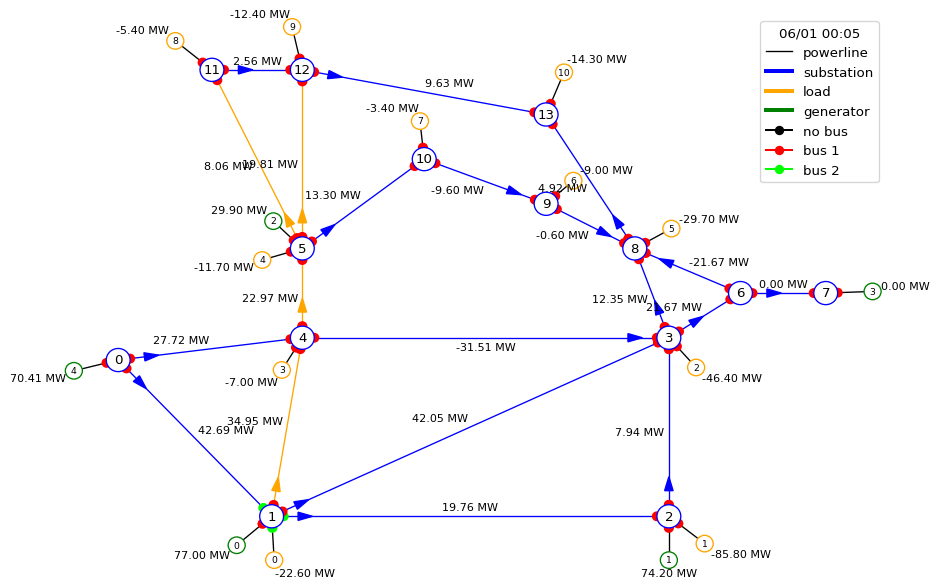

In [8]:
# grid2op simulation of the action
sub_state = get_valid_sub_action(action_space, unit_sub_1, init_topo_vect)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state, line_info = 'p', load_info = 'p', gen_info = 'p')
fig_obs.show()

In [9]:
# Define your action manually (using line id)
sub_id =5
unit_sub_3 = {sub_id: {"lines_id_bus": [(17, 2), (7, 2)],
                      }
             }

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


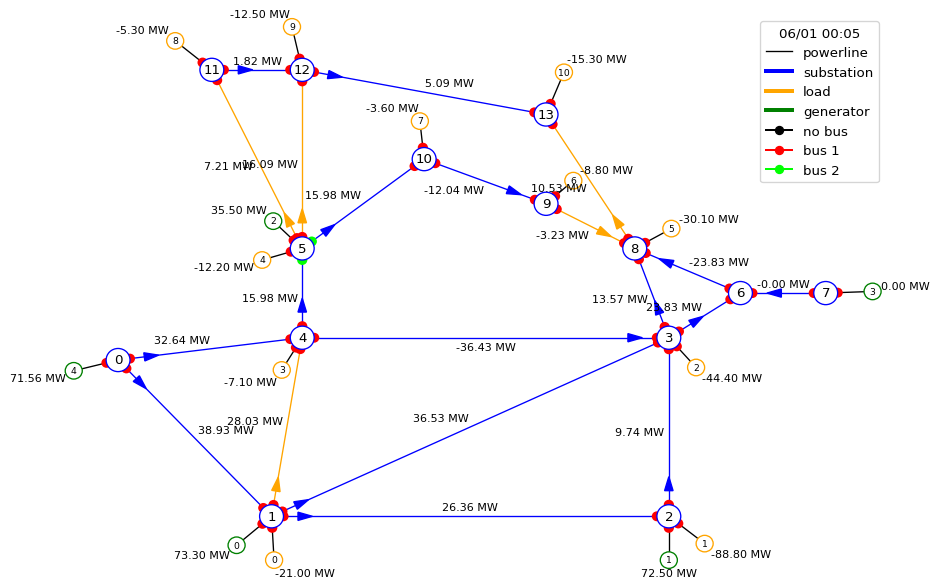

In [10]:
# grid2op simulation of the action
sub_state = get_valid_sub_action(action_space, unit_sub_3, init_topo_vect)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state, line_info = 'p', load_info = 'p', gen_info = 'p')
fig_obs.show()

## C - Action definition example and plot - Line deconexion

In [11]:
# Define your action manually
line_id = 4
unit_line_1 = {line_id: {"set_line": -1}}

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


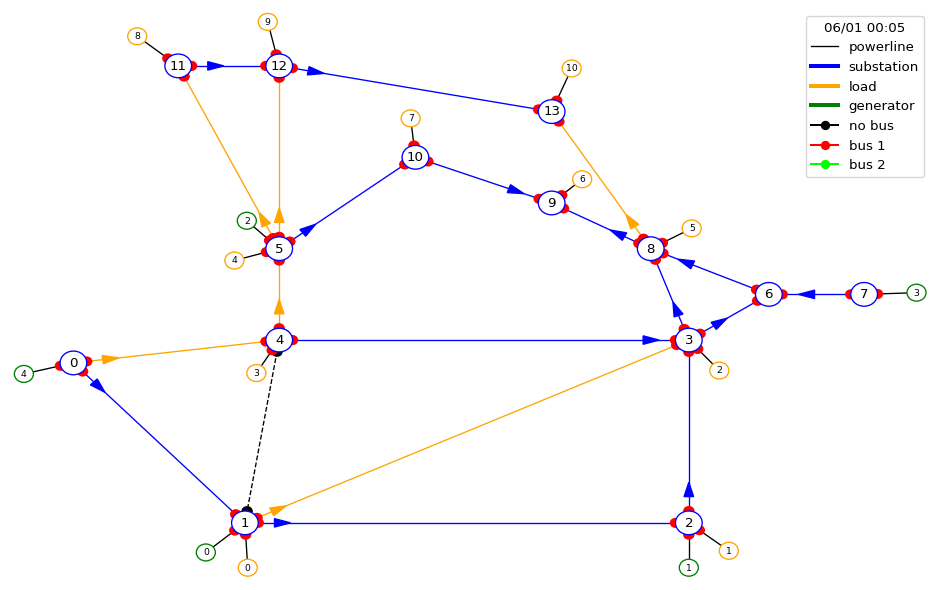

In [12]:
# grid2op simulation of the action
sub_state = get_valid_line_action(unit_line_1, init_line_status)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state)
fig_obs.show()

In [13]:
# Define your action manually
line_id = 16
unit_line_2 = {line_id: {"set_line": -1}}

Is ambigous??? -> False
Exception => []



c:\users\nmegel\.virtualenvs\oracle4grid-cak8mo3w\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


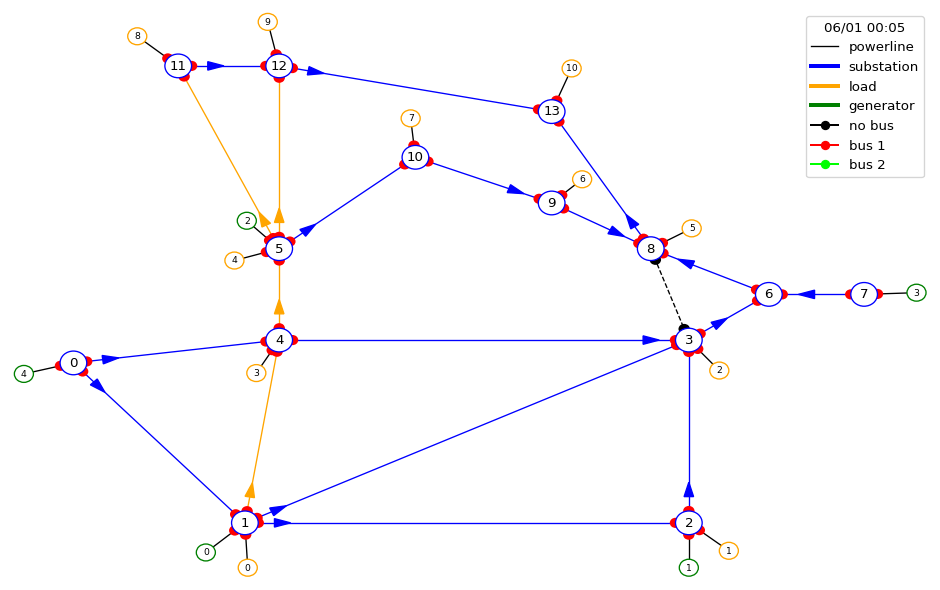

In [14]:
# grid2op simulation of the action
sub_state = get_valid_line_action(unit_line_2, init_line_status)

# Plot state
fig_obs = plot_action(env, plot_helper, sub_state)
fig_obs.show()

## D - Edit your final unitary actions list

In [15]:
# Append to your desired unitary actions
append_unitary_actions(states, 'sub_1', [unit_sub_1, unit_sub_2])
append_unitary_actions(states, 'sub_5', [unit_sub_3])
append_unitary_actions(states, 'line_4', [unit_line_1])
append_unitary_actions(states, 'line_16', [unit_line_2])

# 3 - Final unitary actions

In [16]:
pprint(states)

{'line': {4: [{'set_line': -1}]},
 'sub': {1: [{'lines_id_bus': [(0, 2), (2, 2)], 'loads_id_bus': [(0, 2)]}],
         5: [{'lines_id_bus': [(17, 2), (7, 2)]}]}}


In [18]:
with open(save_action_path, 'w') as f:
    json.dump(states, f)